# MNIST 手写数据的导入

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:421: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:422: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:423: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:424: FutureWarning: Passing (type, 1) or 

ImportError: cannot import name 'keras' from 'tensorflow' (/usr/local/lib/python3.9/site-packages/tensorflow/__init__.py)

In [2]:
!gzip input/MNIST/*.gz -d

zsh:1: no matches found: input/MNIST/*.gz


In [10]:
def load_mnist_data(path):
    fd = open(os.path.join(path, 'train-images-idx3-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    train_X = loaded[16:].reshape((60000, 28, 28, 1)).astype(np.float)
    fd = open(os.path.join(path, 'train-labels-idx1-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    train_Y = loaded[8:].reshape(60000).astype(np.float)
    fd = open(os.path.join(path, 't10k-images-idx3-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    test_X = loaded[16:].reshape((10000, 28, 28, 1)).astype(np.float)
    fd = open(os.path.join(path, 't10k-labels-idx1-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    test_Y = loaded[8:].reshape(10000).astype(np.float)
    return train_X, train_Y, test_X, test_Y

x_train, y_train, x_test, y_test = load_mnist_data('input/MNIST')
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


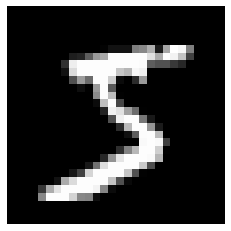

In [4]:
def show_image(data, label):
    import matplotlib.pyplot as plt 
    image = data[:28 * 28].reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.axis("off")
    plt.show()

show_image(x_train[0], y_train[0])

In [13]:
n_labels = 10
y_train = keras.utils.to_categorical(y_train, n_labels)
y_test = keras.utils.to_categorical(y_test, n_labels)

In [14]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [22]:
from keras import layers
inputs = keras.Input(shape=(784,))
inputs.shape

AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'